# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler #метод масштабирования по стандартным отклонениям
from sklearn.linear_model import LinearRegression #импорт модуля линейной регрессии
from sklearn.metrics import make_scorer #импорт метода, создающего скорер 

from sklearn.model_selection import cross_val_score #кросс-валидация

from sklearn.tree import DecisionTreeRegressor #дерево решений
from sklearn.ensemble import RandomForestRegressor #случайный лес
from sklearn.model_selection import GridSearchCV #метод для нахождения наилучших параметров содержит кросс-валидацию

from sklearn.metrics import mean_squared_error #квадратичные отклонения
from sklearn.metrics import mean_absolute_error #импорт метрики среднего абсолютного значения

from sklearn.dummy import DummyRegressor #импорт "глупого" классификатора, для создания baseline модели


Константы

In [2]:
RANDOM_STATE = 100 #константное число для рандома

### Загрузка данных

#### Описание данных

Данные находятся в трёх файлах:
- `gold_recovery_train_new.csv` — обучающая выборка;
- `gold_recovery_test_new.csv` — тестовая выборка;
- `gold_recovery_full_new.csv` — исходные данные.

#### Загрузка датасетов и общая информация

##### Обучающая выборка

In [3]:
# открываем таблицу:
try:
    train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
except:
    try:
        train_df = pd.read_csv('\\Users\maxpe\Downloads\Practicum\Projects\project9 - All2\gold_recovery_train_new.csv')
    except:
        train_df = pd.read_csv('gold_recovery_train_new.csv')
display(train_df.shape);

(14149, 87)

In [4]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
list(train_df)

['date',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.s

Ознакомимся с количеством пропусков в столбцах.

In [7]:
train_df.isnull().sum().sort_values(ascending=False).head(10) #количество пропусков

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
final.output.tail_pb                         100
dtype: int64

##### Тестовая выборка

In [8]:
# открываем таблицу:
try:
    test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
except:
    try:
        test_df = pd.read_csv('\\Users\maxpe\Downloads\Practicum\Projects\project9 - All2\gold_recovery_test_new.csv')
    except:
        test_df = pd.read_csv('gold_recovery_test_new.csv')
display(test_df.shape);

(5290, 53)

In [9]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [11]:
test_df.isnull().sum().sort_values(ascending=False).head(10)

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.xanthate               4
primary_cleaner.input.sulfate                4
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_a_air     3
dtype: int64

##### Исходные данные

In [12]:
# открываем таблицу:
try:
    full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    try:
        full_df = pd.read_csv('\\Users\maxpe\Downloads\Practicum\Projects\project9 - All2\gold_recovery_full_new.csv')
    except:
        full_df = pd.read_csv('gold_recovery_full_new.csv')
display(full_df.shape);

(19439, 87)

In [13]:
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [14]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [15]:
full_df.isnull().sum().sort_values(ascending=False).head(10)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
final.output.concentrate_sol                 211
rougher.input.feed_size                      145
primary_cleaner.output.concentrate_pb        116
primary_cleaner.input.xanthate               104
final.output.tail_pb                         101
dtype: int64

##### Краткие выводы

Мы загрузили данные из трех датасетов: 
- исходных данных, содержащих все данные,
- тренировочных данных
- и тестовых данных.

Ознакомились с информацией о размерах датасетов и данных, которые в них хранятся. Узнали количество пропусков в каждом датасете. Эта информация понадобится в дальнейших расчетах.

#### Формула вычисления эффективности обогащения

Эффективность обогащения рассчитывается по формуле

`Recovery = (C*(F-T))/(F*(C-T))*100`,

где:

- `C` — доля золота в концентрате после флотации/очистки;
- `F` — доля золота в сырье/концентрате до флотации/очистки;
- `T` — доля золота в отвальных хвостах после флотации/очистки.

Здесь нужно вычислить MAE для данных из обучающей выборки и для признака `rougher.output.recovery`,
- `C` - это `rougher.output.concentrate`, 
- `T` - `rougher.output.tail`, 
- `F` - `rougher.input.feed`

для металла `au` - золота.

In [16]:
recovery_calculated = [] #список для будущих рассчитанных значений
for i in range(len(train_df)): #вычисляем по формуле внутри цикла
    recovery_calculated.append(
        (train_df['rougher.output.concentrate_au'][i]*(train_df['rougher.input.feed_au'][i]-train_df['rougher.output.tail_au'][i]))\
                /(train_df['rougher.input.feed_au'][i]*(train_df['rougher.output.concentrate_au'][i]-train_df['rougher.output.tail_au'][i]))*100)

Найдем MAE между `rougher.output.recovery` и `recovery_calculated`.

In [17]:
#собираем таблицу
calc_table = pd.DataFrame({
    'rougher.output.recovery': train_df['rougher.output.recovery'],
    'recovery_calculated': recovery_calculated})
display(calc_table)

,rougher.output.recovery,recovery_calculated
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


In [18]:
#вывод MAE
display(mean_absolute_error(calc_table['rougher.output.recovery'], calc_table['recovery_calculated']))

9.73512347450521e-15

Средняя абсолютная ошибка очень низкая, -14 порядка, т.е. близка к 0. Следовательно, эффективность обогащения рассчитана правильно.

#### Признаки, недоступные в тестовой выборке

Рассмотрим признаки, которых нет в тестовой выборке:

In [19]:
train_list = list(train_df) 
test_list = list(test_df)

not_in_test = [] #список для значений, которых нет в тесте
for i in train_list:
    if i not in test_list:
        not_in_test.append(i)
    else:
        test_list.remove(i)
display(not_in_test)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [20]:
len(not_in_test) #количество элементов списка

34

В тестовой выборке отсутствуют 34 признака, почти все признаки имеют атрибут `output` - параметры продукта. То есть это и первичная очитска, и вторичная очистка, и флотация, и финальные характеристики с типом параметра `output` - то, что получам на выходе после каждого этапа. Также в отсутствующие признаки входит `rougher.calculation` - расчетные характеристики.

Так как данные, которые отсутствуют в тестовой выборке, мы не можем использовать для обучения (у нас их как будто нет), то их нужно будет убрать и для обучающей выборки: мы должны обучать модели на тех же признаках, которые доступны и для проверки.

Целевыми признаками являются сразу два параметра: `rougher.output.recovery` и `final.output.recovery`. Их нужно будет вынести в выборку таргетов.

Тип всех данных - `float`.

### Предобработка данных

#### Преобразование типов данных

Тип данных `float` подходит для обучения моделей. Тип данных для даты следует изменить на `datetime`.

In [21]:
#преобразование типа данных в дату
train_df['date'] = pd.to_datetime(
    train_df['date'], format='%Y-%m-%d %H:%M:%S'
)

test_df['date'] = pd.to_datetime(
    test_df['date'], format='%Y-%m-%d %H:%M:%S'
)

full_df['date'] = pd.to_datetime(
    full_df['date'], format='%Y-%m-%d %H:%M:%S'
)

#проверим на тестовой выборке, как изменился тип даты:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

#### Поиск дубликатов

In [22]:
display(train_df.duplicated().sum()) #поиск полных дублей
display(test_df.duplicated().sum())
display(full_df.duplicated().sum())


0

0

0

Поиск дубликатов в столбце `date`. Т.к. этот столбец играет роль индекса, повторов не должно быть (на пропуски мы уже проверили, пропусков тут нет).

In [23]:
display(full_df['date'].duplicated().sum())

0

Явных дубликатов нет, даже в исходном датасете (где имеются все данные).

#### Обработка пропусков

Создаем списки для удоброго взаимодействия с датасетом. 

In [24]:
features_list = list(train_df.drop(not_in_test, axis=1))
target_list = ['rougher.output.recovery', 'final.output.recovery']

output_concentrate_au_list = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
output_concentrate_ag_list = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
output_concentrate_pb_list = ['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
output_concentrate_list = output_concentrate_au_list + output_concentrate_ag_list + output_concentrate_pb_list

feed_size_list = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

Рассмотрим те признаки, которые втречаются в `test_df`, будущие целевые признаки, а также необходимые для дальнейших расчетов данные, такие как размер гранул или концентрация. Рассмотрим датасет `train_df`.

In [25]:
check_list = features_list + output_concentrate_list + target_list #создание проверочного списка

train_check = train_df[check_list] #проверочный датасет
train_check.isnull().sum().sort_values(ascending=False).head(10) #пропуски данных, используемых в работе (из проверочного датасета)

rougher.state.floatbank10_e_air             436
rougher.input.floatbank11_xanthate          428
secondary_cleaner.state.floatbank2_a_air    217
rougher.input.feed_size                     144
rougher.input.feed_pb                       100
primary_cleaner.input.xanthate              100
rougher.input.feed_pb                       100
primary_cleaner.output.concentrate_pb        86
rougher.input.feed_sol                       78
rougher.input.floatbank11_sulfate            36
dtype: int64

Рассмотрим более подробно первые 8 столбцов с пропусками. Оставшиеся можно заполнить медианой сразу, т.к. пропусков в этих столбцах мало и это не исказит данные.

Соберем таблицу из лидеров по пропускам.

In [26]:
#создаем список из первых восьми значений по количеству пропусков
max_empty_list_train_df = list(train_df.isnull().sum().sort_values(ascending=False).index)[:8] 
#создаем датасет со столбцами - элементами списка и выводим первые 5 элементов
max_empty_train_df = train_df.loc[:, max_empty_list_train_df]
max_empty_train_df.head()

,secondary_cleaner.output.tail_sol,rougher.state.floatbank10_e_air,rougher.input.floatbank11_xanthate,primary_cleaner.output.concentrate_sol,secondary_cleaner.state.floatbank2_a_air,final.output.concentrate_sol,rougher.input.feed_size,primary_cleaner.input.xanthate
0,8.764648,1404.472046,6.005818,19.529297,25.853109,5.507324,55.486599,0.988759
1,9.001494,1399.227084,6.012594,19.369147,25.880539,5.257781,57.278666,1.002663
2,8.842896,1399.180945,6.204633,19.167579,26.005245,5.383759,57.510649,0.991265
3,9.122857,1400.943157,6.196578,15.978538,25.942508,4.858634,57.792734,0.996739
4,8.871028,1401.560902,6.194897,19.199864,26.024787,4.939416,56.047189,1.009869


Построим общий для всех график `barplot`, оценим медианы и средние значения.

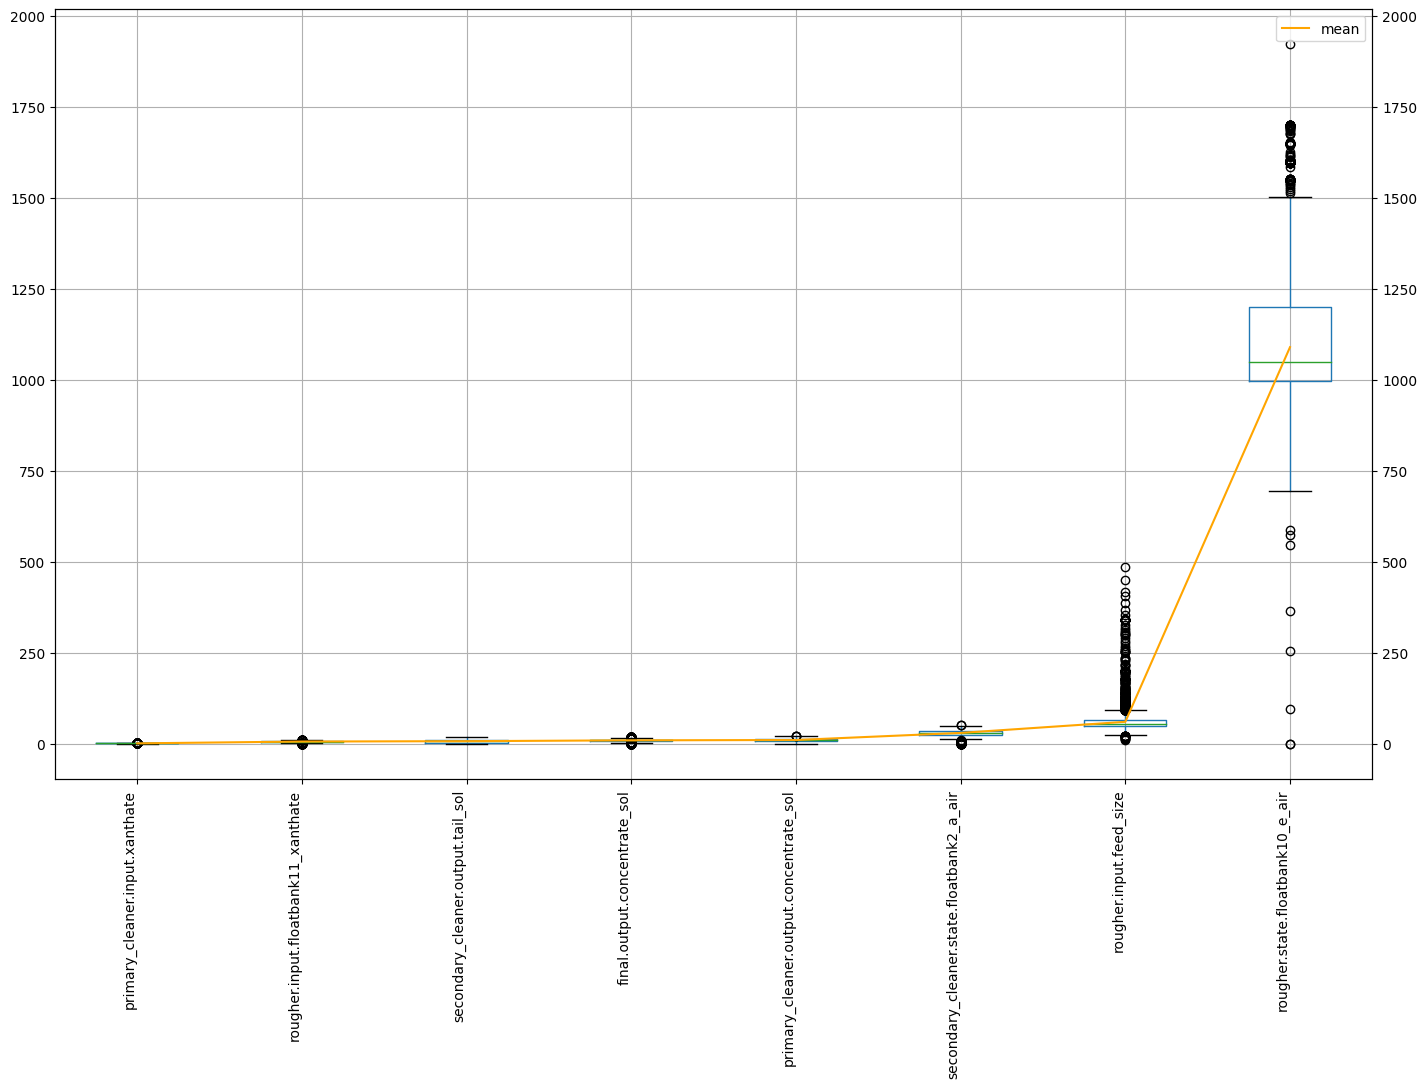

In [27]:
idx = max_empty_train_df.mean().sort_values().index #упорядочивание платформ в порядке возрастания среденего
max_empty_train_df = max_empty_train_df[idx] #присвоить таблице упорядоченный вид

fig, ax = plt.subplots(figsize=(17,10)) #св-ва графика

max_empty_train_df.plot.box(rot=0, ax=ax, grid=True) #ящики с подписью без вращения
ax.set_xticklabels(max_empty_train_df, rotation=90, ha='right')

ax2 = ax.twinx() #создание второй оси
ax2.plot(ax.get_xticks(), max_empty_train_df.mean(), color='orange') #график средней
ax2.set_ylim(ax.get_ylim()) #задание лимитов по оси y в соответствии с ящиками с усами

plt.legend(['mean']); #легенда

Т.к. мы построили без масштабирования. Видим, что столбец `rougher.input.feed_size` имеет наибольшее количество выбросов, а столбец `rougher.state.floatbank10_e_air` в абсолютных значениях сильно превосходит остальные данные. Рассмотрим его отдельно.

<AxesSubplot:>

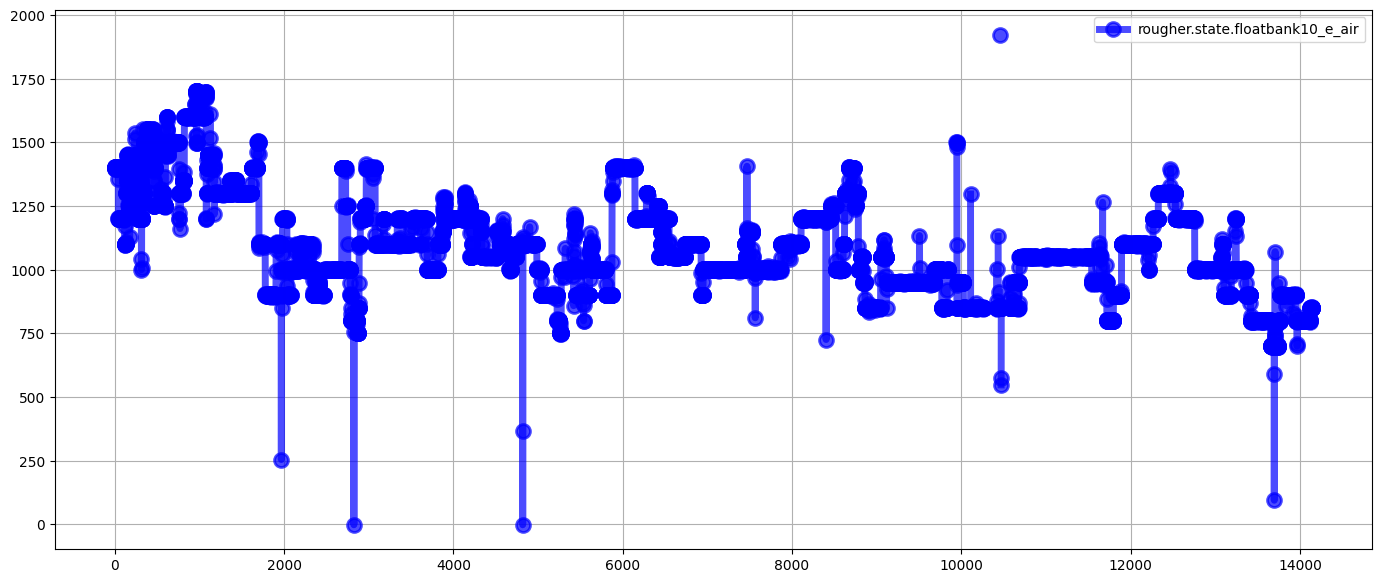

In [28]:
train_df.plot( #создаем график со стилем точка-линия синего цвета, сеткой, определенной толщиной линий
    y='rougher.state.floatbank10_e_air', style='o-b', sharex=False, grid=True,
    alpha=0.7, label="rougher.state.floatbank10_e_air",
    lw=5, mew=2, ms=10, figsize=(17, 7))

Этот параметр имеет большой разброс, а также, в среднем, тенденцию к убыванию. Также имеет невысокое количество выбросов вниз. Заполним пропуски предыдущими значениями. 

In [29]:
#заполнение пропусков значениями из предыдущей ячейки
train_df['rougher.state.floatbank10_e_air'].fillna(method = 'bfill', inplace = True)

Снова построим `barplot`, но уже `rougher.state.floatbank10_e_air`.

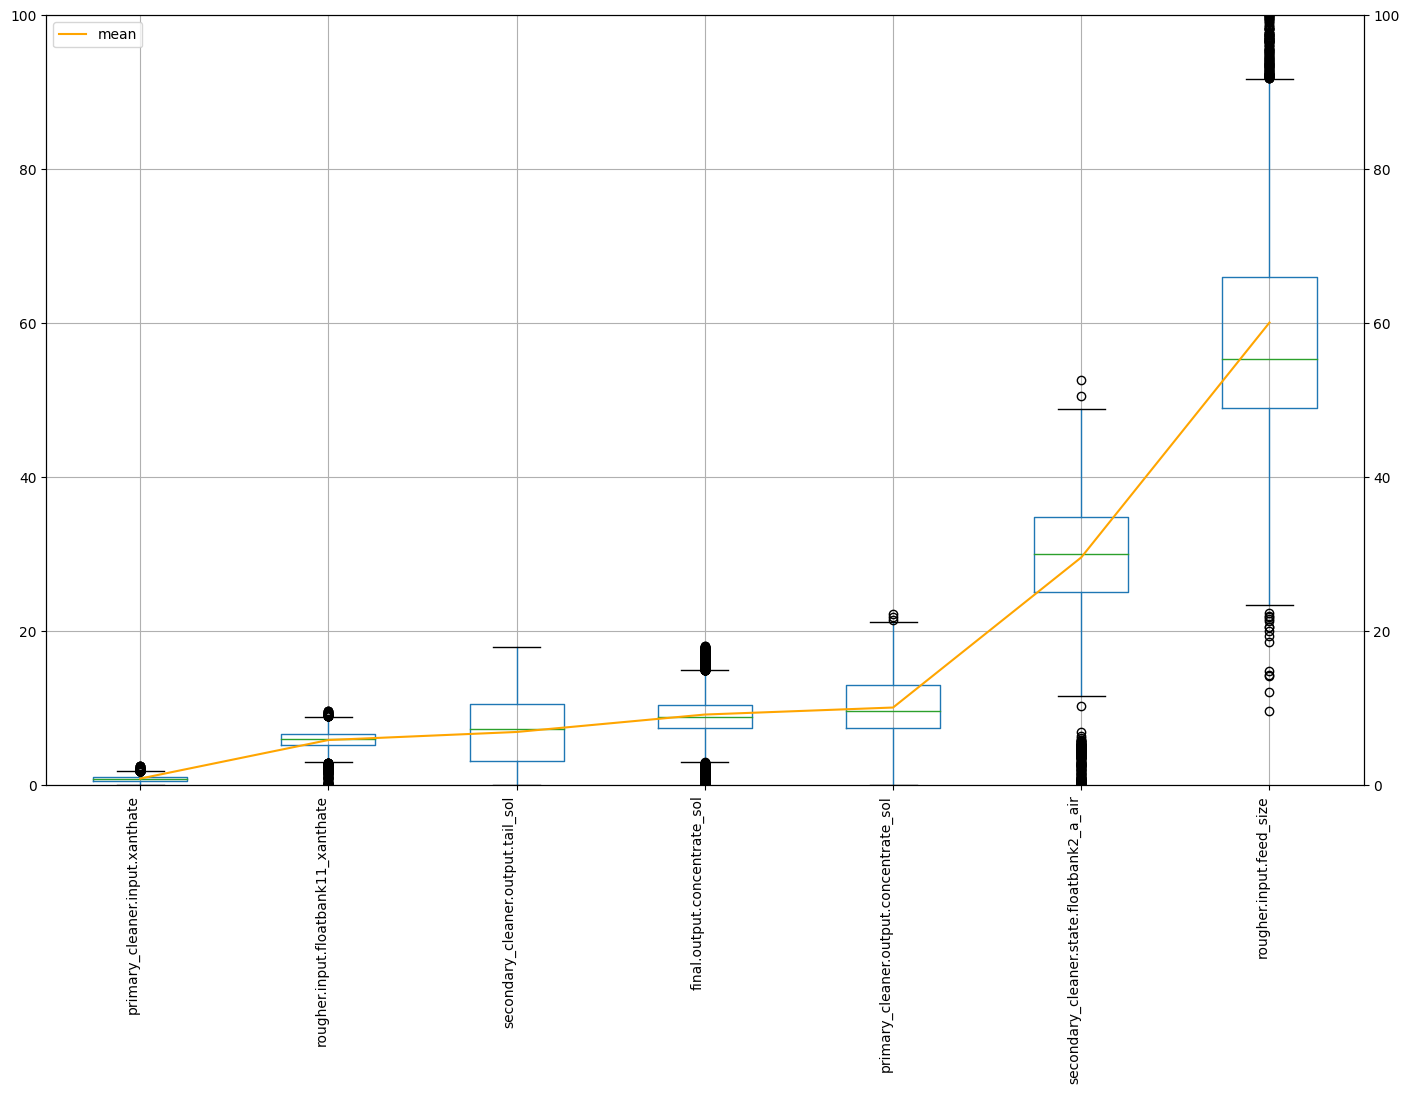

In [30]:
max_empty_train_df_dropped = max_empty_train_df.drop(['rougher.state.floatbank10_e_air'], axis=1)

idx1 = max_empty_train_df_dropped.mean().sort_values().index #упорядочивание платформ в порядке возрастания среденего
max_empty_train_df_dropped = max_empty_train_df_dropped[idx1] #присвоить таблице упорядоченный вид

fig, ax = plt.subplots(figsize=(17,10)) #св-ва графика

max_empty_train_df_dropped.plot.box(rot=0, ax=ax, grid=True) #ящики с подписью без вращения
ax.set_xticklabels(max_empty_train_df_dropped, rotation=90, ha='right')

ax.set_ylim(0,100)
ax2 = ax.twinx() #создание второй оси
ax2.plot(ax.get_xticks(), max_empty_train_df_dropped.mean(), color='orange') #график средней
ax2.set_ylim(0,100) #задание лимитов по оси y в соответствии с ящиками с усами
plt.legend(['mean'], loc='upper left'); #легенда

Видим, что в целом, можем заполнить все столбцы медианными значениями, кроме `rougher.input.feed_size`, для этого столбца пропуски лучше заполнить средними значениями, т.к. мы не убираем выбросы (мы не знаем их природу и важность для обучения), и медиана значительно ниже, чем среднее значение.

In [31]:
#заполнение средним
train_df.fillna(train_df['rougher.input.feed_size'].mean(), inplace = True)

Остальные столбцы заполняем медианой.

In [32]:
train_df.fillna(train_df.median(), inplace = True)

C:\Users\maxpe\AppData\Local\Temp\ipykernel_16788\3275060589.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train_df.fillna(train_df.median(), inplace = True)


In [33]:
train_df.isnull().sum().sort_values(ascending=False).sum() #проверка на пропуски

0

Пропусков нет. 

Повторим все с датасетом `test_df`: 
- при наличии пропусков в `rougher.state.floatbank10_e_air` - заполним предыдущими значениями,
- в `rougher.input.feed_size` - средними значениями,
- остальные столбцы - медианой.

In [34]:
test_df.isnull().sum().sort_values(ascending=False).head(10) #проверяем пропуски в тестовой выборке

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.xanthate               4
primary_cleaner.input.sulfate                4
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_a_air     3
dtype: int64

Имеем другие пропуски. Проверим столбцы `rougher.state.floatbank10_e_air` и `rougher.input.feed_size`, т.к. для них данные мы заполняли не медианой.

In [35]:
display(test_df['rougher.state.floatbank10_e_air'].isnull().sum())
display(test_df['rougher.input.feed_size'].isnull().sum())

0

1

Заполним единственный пропуск в `rougher.input.feed_size` средним значением. Все остальное - медианными значениями.

In [36]:
test_df.fillna(test_df['rougher.input.feed_size'].mean(), inplace = True)
test_df.fillna(test_df.median(), inplace = True)

C:\Users\maxpe\AppData\Local\Temp\ipykernel_16788\720691601.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test_df.fillna(test_df.median(), inplace = True)


In [37]:
test_df.isnull().sum().sort_values(ascending=False).sum() #проверка пропусков

0

### Выводы по подготовке и предобработке данных

Мы загрузили данные и изучили их. Была рассчитана эффективность обогащения руды и найдено `MAE`. Его значение близко к нулю, что значит, что рассчитанные значения - верные. 

Пропуски в необходимых данных были заполнены. Также проведена проверка на дубликаты и проведена работа с типами данных.

## Анализ данных

### Изменение концентрации элементов на каждом этапе

Концентрация элементов хранится в данных с меткой `concentrate`.

Имеется 4 значения концентрации элементов, один из них является концентрацией на входе этапа - сырье, остальные - являются выходным продуктом своего этапа:

- сырье: `rougher.input.feed_металл`,
- флотация: `rougher.output.concentrate_металл`,
- первичный этап очистки: `primary_cleaner.output.concentrate_металл`,
- финальный этап: `final.output.concentrate`.

Этих данных нет в датасете `test`, а значит, они имеются только в `full_df` и `train_df`.
На выходе второго этапа данных тоже нет.

Эти данные мы можем проверить на данных из датасета `train_df`. Так мы увидим только те данные, на которых далее будет проводиться обучение.

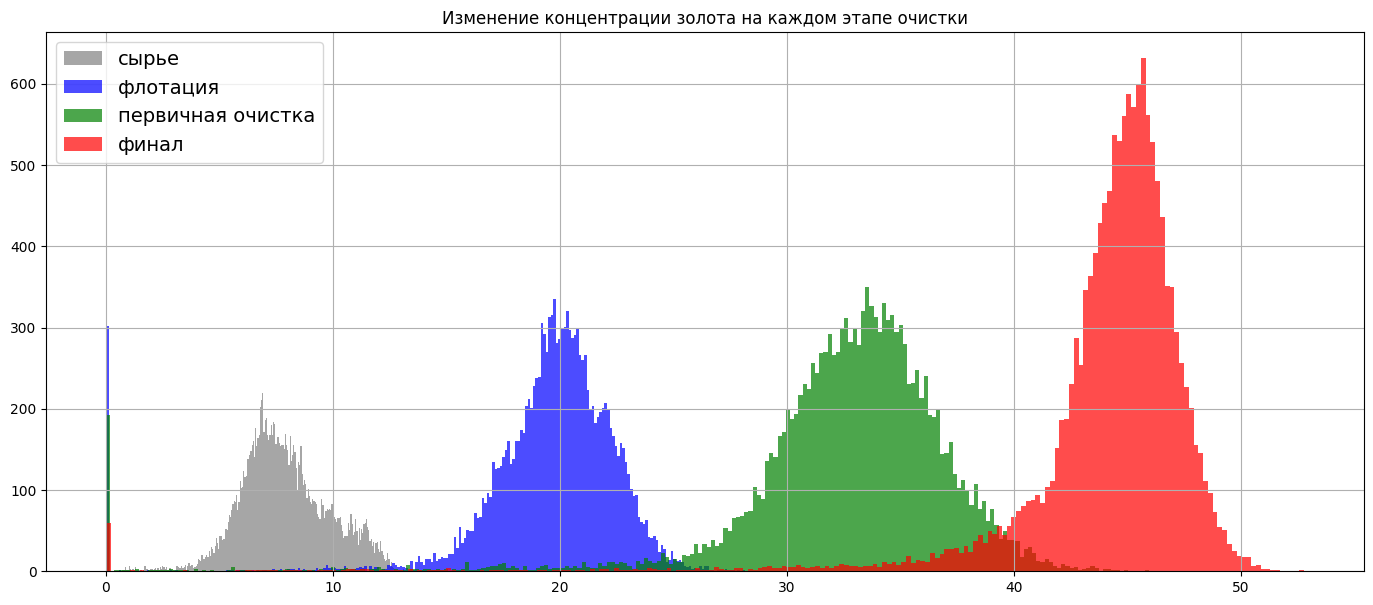

In [38]:
#строим совмещенную гистограмму с указанным количеством корзин и прозрачностью. 
fig = plt.figure(figsize =(17, 7))
n_bins = 250
x_alpha = 0.7
#применяем также цвет и название
train_df[output_concentrate_au_list[0]].hist(bins=n_bins, alpha = x_alpha, color = 'Grey', grid=True, label='сырье')
train_df[output_concentrate_au_list[1]].hist(bins=n_bins, alpha = x_alpha, color = 'Blue', grid=True, label='флотация')
train_df[output_concentrate_au_list[2]].hist(bins=n_bins, alpha = x_alpha, color = 'Green', grid=True, label='первичная очистка')
train_df[output_concentrate_au_list[3]].hist(bins=n_bins, alpha = x_alpha, color = 'Red', grid=True, label='финал')
plt.legend(fontsize=14) #вывод легенды
plt.title('Изменение концентрации золота на каждом этапе очистки'); #заголовок

Из гистограммы видим, что на каждом последующем этапе концентрация золота (ось Х) увеличивается. На входе сырья (серый), вершина распределения наблюдается на отметке ~7. На первом этапе обогащения, выход флотации (синий), вершина распределения наблюдалась на отметке в ~20 единиц. После первичной очистки (зеленый) наблюдаем вершину в ~32 единицах. На финальном этапе (красный), пик приходится на значение ~46. 

Также, можно обратить внимание, что выбросы нулевого значения тоже падают на каждом этапе (кроме сырья, т.к. руду еще не обогащают).

Так как добывается именно золото, то графики наглядно показывают увеличение концентрации золота, то есть то, что и требуется для производства. Обогащение проходит успешно.

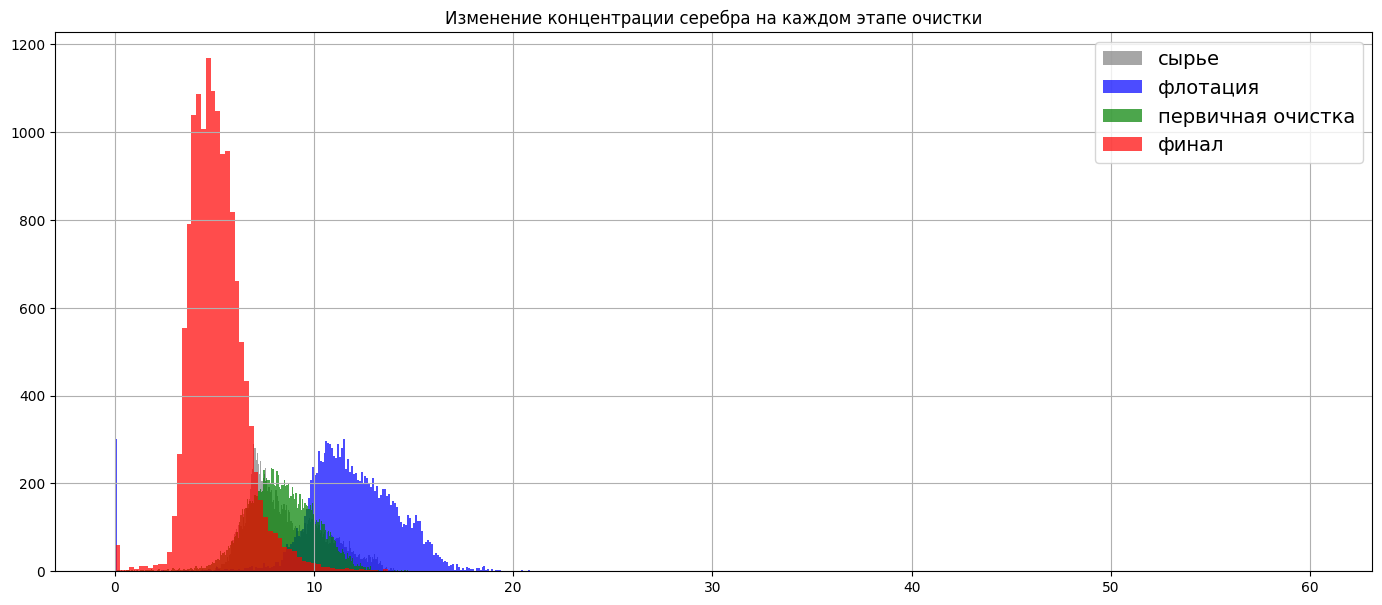

In [39]:
fig = plt.figure(figsize =(17, 7))
n_bins = 250
x_alpha = 0.7
train_df[output_concentrate_ag_list[0]].hist(bins=n_bins, alpha = x_alpha, color = 'Grey', grid=True, label='сырье')
train_df[output_concentrate_ag_list[1]].hist(bins=n_bins, alpha = x_alpha, color = 'Blue', grid=True, label='флотация')
train_df[output_concentrate_ag_list[2]].hist(bins=n_bins, alpha = x_alpha, color = 'Green', grid=True, label='первичная очистка')
train_df[output_concentrate_ag_list[3]].hist(bins=n_bins, alpha = x_alpha, color = 'Red', grid=True, label='финал')
plt.legend(fontsize=14)
plt.title('Изменение концентрации серебра на каждом этапе очистки');

Концентрация серебра, напротив, на каждом последующем этапе обогащения уменьшается. На входе концентрация серебра в сырье такая же, как концентрация золота.

Возможно, его уменьшение связано с тем, что его используют в химических реакциях при выделении золота из руды, или серебро легко удалять из золотосодержащей руды при обогащении.

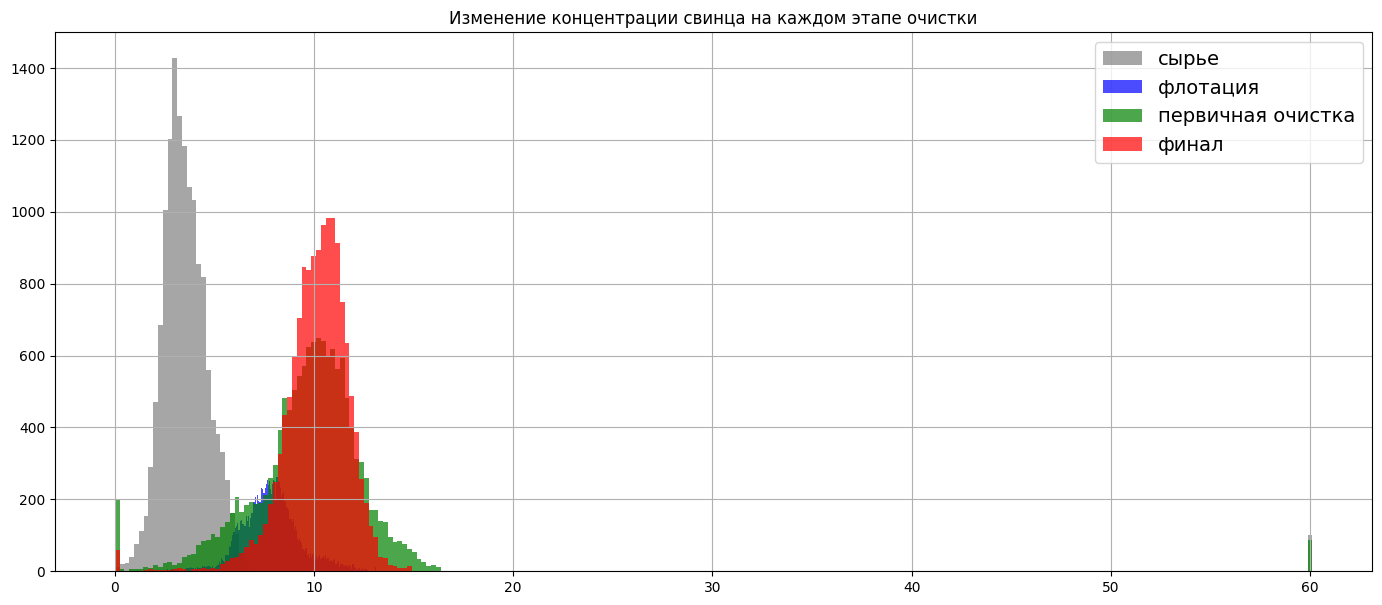

In [40]:
fig = plt.figure(figsize =(17, 7))
n_bins = 250
x_alpha = 0.7
train_df[output_concentrate_pb_list[0]].hist(bins=n_bins, alpha = x_alpha, color = 'Grey', grid=True, label='сырье')
train_df[output_concentrate_pb_list[1]].hist(bins=n_bins, alpha = x_alpha, color = 'Blue', grid=True, label='флотация')
train_df[output_concentrate_pb_list[2]].hist(bins=n_bins, alpha = x_alpha, color = 'Green', grid=True, label='первичная очистка')
train_df[output_concentrate_pb_list[3]].hist(bins=n_bins, alpha = x_alpha, color = 'Red', grid=True, label='финал')
plt.legend(fontsize=14)
plt.title('Изменение концентрации свинца на каждом этапе очистки');

Концентрация свинца не изменяется, но распределение сужается, то есть уменьшается разброс. В сырье распределение свинца тоже с невысоким разбросом, а его концентрация довольно низкая.

Удалим строки с явными выбросами - справа на данных по серебру и свинцу, слева - по золоту. Также, обратим внимание на нулевые значения для золота: если на первом этапе поступает руда без драгоценного металла, то ее количество на каждом этапе после очисток будет уменьшаться, т.к. идет процесс обогащения - из руды выводятся ненужные вещества.

In [41]:
train_df.shape

(14149, 87)

In [42]:
# избавляемся от выбросов
train_df = train_df[(train_df['rougher.output.concentrate_au'] > 5) | (train_df['rougher.output.concentrate_au'] == 0)]
train_df = train_df[(train_df['primary_cleaner.output.concentrate_au'] > 15) | (train_df['primary_cleaner.output.concentrate_au'] == 0)]
train_df = train_df[(train_df['final.output.concentrate_au'] > 20) | (train_df['final.output.concentrate_au'] == 0)]

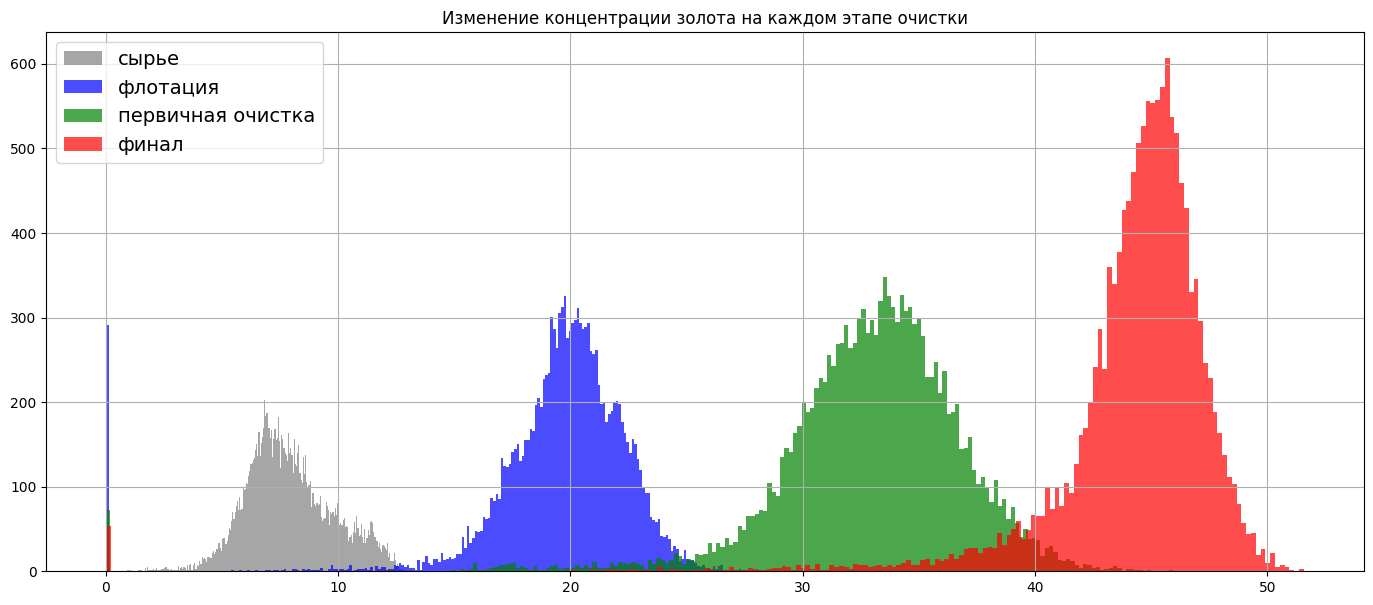

In [43]:
fig = plt.figure(figsize =(17, 7))
n_bins = 250
x_alpha = 0.7
train_df[output_concentrate_au_list[0]].hist(bins=n_bins, alpha = x_alpha, color = 'Grey', grid=True, label='сырье')
train_df[output_concentrate_au_list[1]].hist(bins=n_bins, alpha = x_alpha, color = 'Blue', grid=True, label='флотация')
train_df[output_concentrate_au_list[2]].hist(bins=n_bins, alpha = x_alpha, color = 'Green', grid=True, label='первичная очистка')
train_df[output_concentrate_au_list[3]].hist(bins=n_bins, alpha = x_alpha, color = 'Red', grid=True, label='финал')
plt.legend(fontsize=14)
plt.title('Изменение концентрации золота на каждом этапе очистки');

In [44]:
train_df = train_df[train_df['rougher.input.feed_ag'] < 15]
train_df = train_df[train_df['rougher.output.concentrate_ag'] < 20]
train_df = train_df[train_df['primary_cleaner.output.concentrate_ag'] < 17]
train_df = train_df[train_df['final.output.concentrate_ag'] < 12]

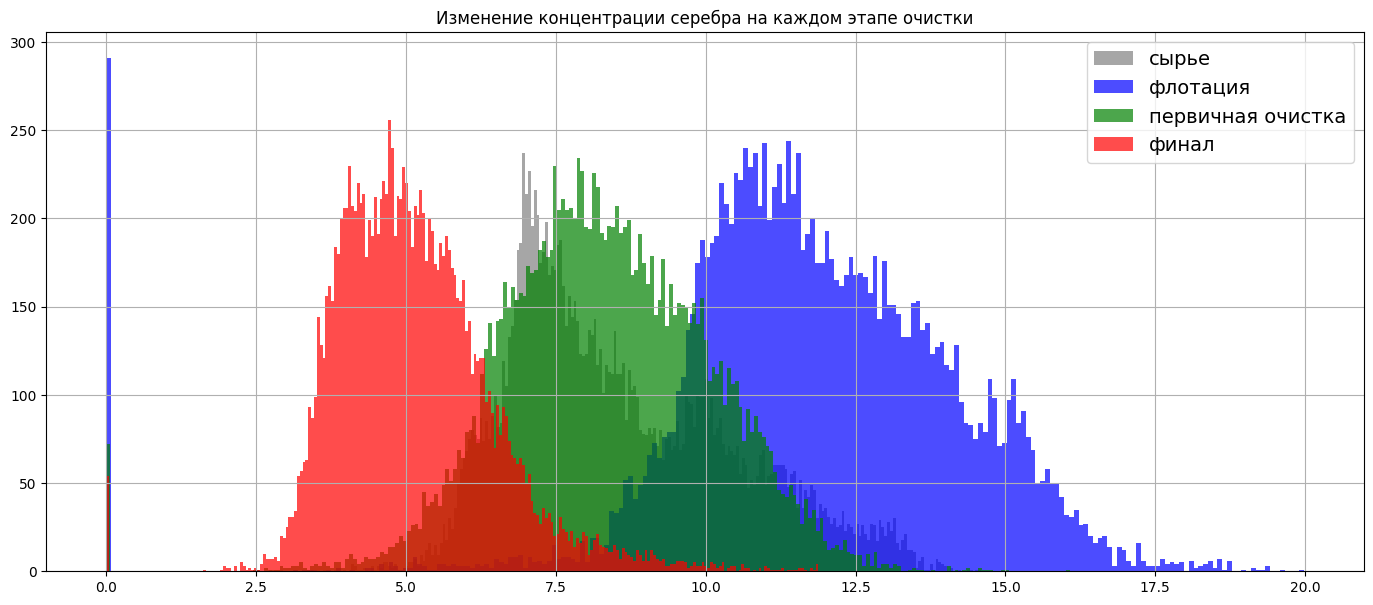

In [45]:
fig = plt.figure(figsize =(17, 7))
n_bins = 250
x_alpha = 0.7
train_df[output_concentrate_ag_list[0]].hist(bins=n_bins, alpha = x_alpha, color = 'Grey', grid=True, label='сырье')
train_df[output_concentrate_ag_list[1]].hist(bins=n_bins, alpha = x_alpha, color = 'Blue', grid=True, label='флотация')
train_df[output_concentrate_ag_list[2]].hist(bins=n_bins, alpha = x_alpha, color = 'Green', grid=True, label='первичная очистка')
train_df[output_concentrate_ag_list[3]].hist(bins=n_bins, alpha = x_alpha, color = 'Red', grid=True, label='финал')
plt.legend(fontsize=14)
plt.title('Изменение концентрации серебра на каждом этапе очистки');

In [46]:
train_df = train_df[train_df['rougher.input.feed_pb'] < 10]
train_df = train_df[train_df['rougher.output.concentrate_pb'] < 15]
train_df = train_df[train_df['primary_cleaner.output.concentrate_pb'] < 18]
train_df = train_df[train_df['final.output.concentrate_pb'] < 16]

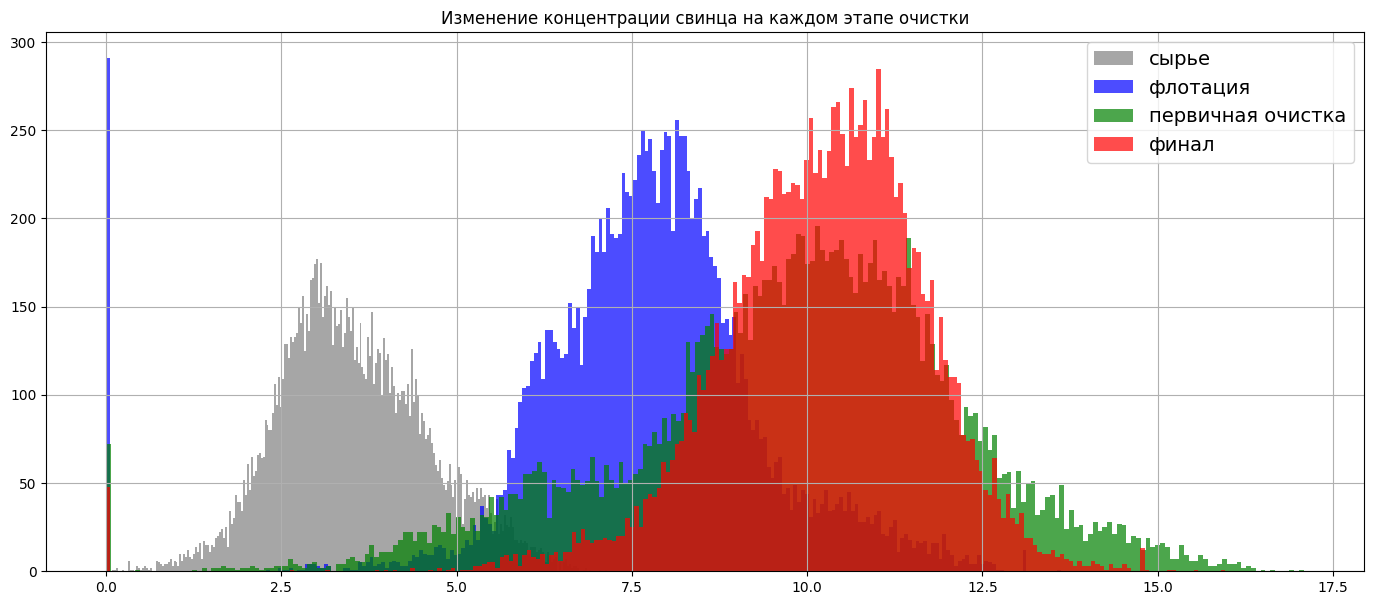

In [47]:
fig = plt.figure(figsize =(17, 7))
n_bins = 250
x_alpha = 0.7
train_df[output_concentrate_pb_list[0]].hist(bins=n_bins, alpha = x_alpha, color = 'Grey', grid=True, label='сырье')
train_df[output_concentrate_pb_list[1]].hist(bins=n_bins, alpha = x_alpha, color = 'Blue', grid=True, label='флотация')
train_df[output_concentrate_pb_list[2]].hist(bins=n_bins, alpha = x_alpha, color = 'Green', grid=True, label='первичная очистка')
train_df[output_concentrate_pb_list[3]].hist(bins=n_bins, alpha = x_alpha, color = 'Red', grid=True, label='финал')
plt.legend(fontsize=14)
plt.title('Изменение концентрации свинца на каждом этапе очистки');

In [48]:
train_df.shape

(13657, 87)

Мы потеряли около 2% данных, но избавились от аномальных выбросов. Также можем проследить, что нулевая концентрация каждого металла совпадает с другими металлами на каждом этапе. Это значит, что мы имеем одни и те же данные для каждого значения. Если в руде нет золота, то в ней не будет ни серебра, ни свинца - это около 300 строк данных (смотрим по этапу выхода с флотации).

### Распределение гранул сырья

Размер гранул сырья хранится в столбцах с обозначением `feed_size`. Это столбцы:
- `rougher.input.feed_size` - размер гранул на входе флотации,
- `primary_cleaner.input.feed_size` - размер гранул на входе первичной очистки.

Необходимо сравнить данные на тестовой и обучающей выборках. Они должны быть похожими, для корректной работы модели.

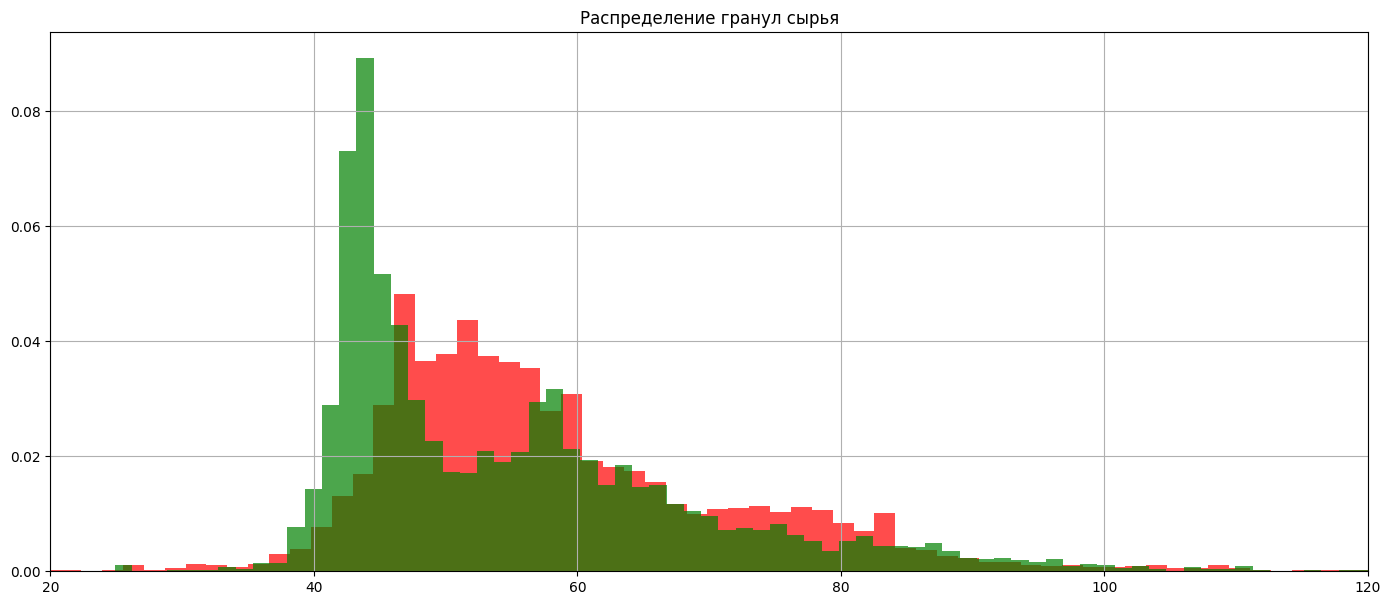

In [49]:
fig = plt.figure(figsize =(17, 7))
n_bins = 300
x_alpha = 0.7
train_df['rougher.input.feed_size'].hist(bins=n_bins, density=True, alpha = x_alpha, color = 'Red', grid=True)
test_df['rougher.input.feed_size'].hist(bins=n_bins, density=True, alpha = x_alpha, color = 'Green', grid=True)
plt.xlim(20,120)
plt.title('Распределение гранул сырья');

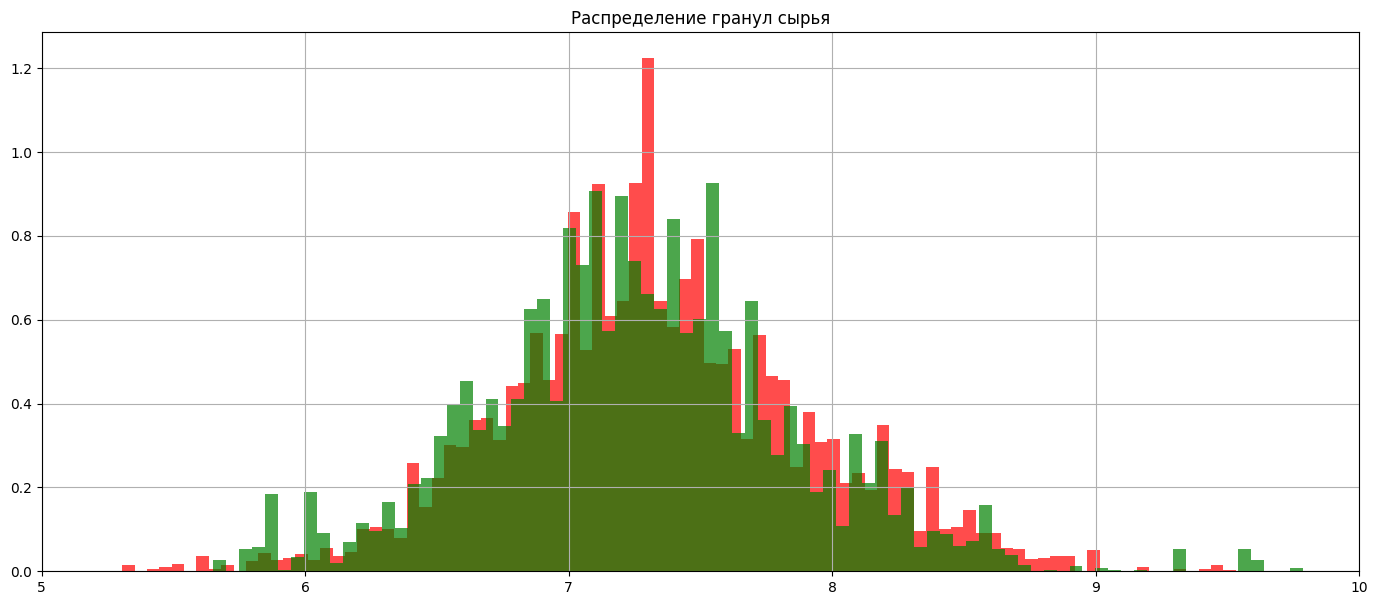

In [50]:
fig = plt.figure(figsize =(17, 7))
n_bins = 200
x_alpha = 0.7
train_df['primary_cleaner.input.feed_size'].hist(bins=n_bins, density=True, alpha = x_alpha, color = 'Red', grid=True)
test_df['primary_cleaner.input.feed_size'].hist(bins=n_bins, density=True, alpha = x_alpha, color = 'Green', grid=True)
plt.xlim(5,10)
plt.title('Распределение гранул сырья');

Мы построили нормированные гистограммы. По ним видно, что и обучающая выборка, и тестовая выборка, имеют похожие распределения для `rougher.input.feed_size` со смещенными пиковыми значениями, и практически одинаковое распределение для `primary_cleaner.input.feed_size`.

С такими данными модели будут работать достаточно корректно.

###  Суммарная концентрация всех веществ

Найти суммарную концентрацию всех веществ на разных стадиях: в сырье (`rougher.input.feed`), в черновом (`rougher.output.concentrate`) и финальном концентратах (`final.output.concentrate`).

Смесь руды - сырье:

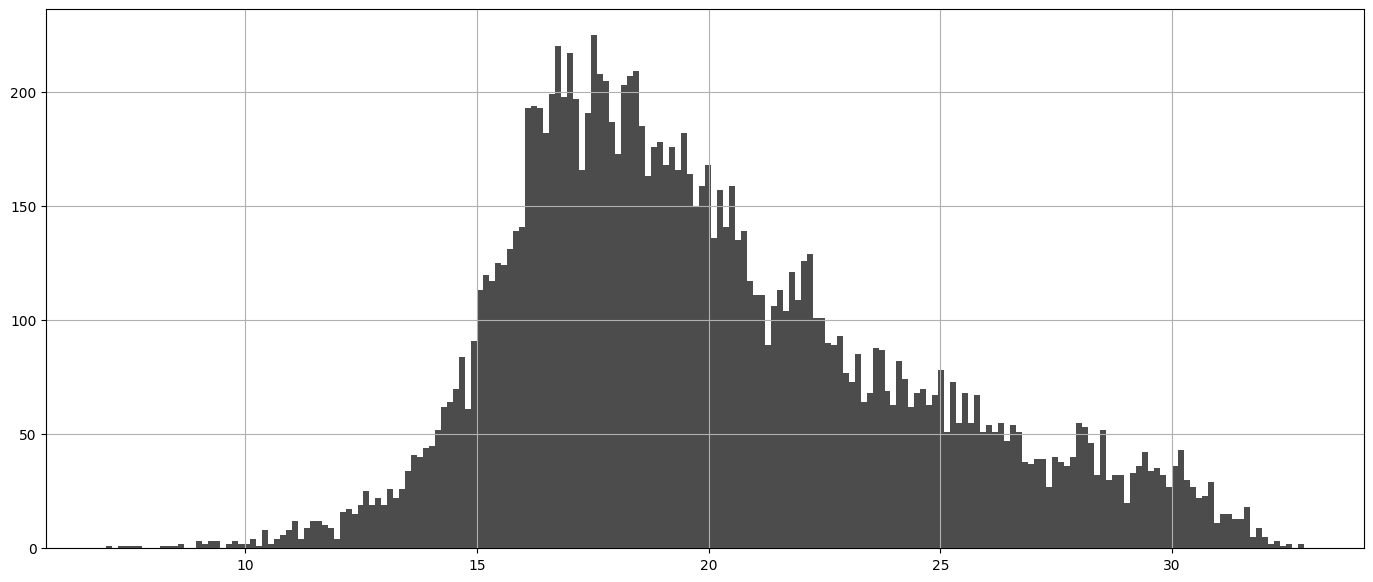

In [51]:
rougher_feed = train_df.loc[:, ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']]
#находим суммарное значение концентраций металлов на каждом этапе
rougher_feed['sum_concentrate'] = rougher_feed['rougher.input.feed_au'] + rougher_feed['rougher.input.feed_ag'] + rougher_feed['rougher.input.feed_pb']
fig = plt.figure(figsize =(17, 7))
n_bins = 200
x_alpha = 0.7
rougher_feed['sum_concentrate'].hist(bins=n_bins, alpha = x_alpha, color = 'Black', grid=True); #строим гистограмму


In [52]:
rougher_feed.sort_values(by='sum_concentrate', ascending=True).head() #проверяем на нулевые значения

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,sum_concentrate
7080,2.764036,2.926127,1.301264,6.991427
9661,2.943752,2.866967,1.526277,7.336996
13231,3.131629,2.713826,1.576488,7.421942
4563,3.252483,2.853549,1.446014,7.552046
1413,3.356855,3.150971,1.250138,7.757964


In [53]:
rougher_feed['sum_concentrate'].mean() #ищем средние суммарные концентрации на фходе этапа флотации

20.06271407010031

Черновой концентрат:

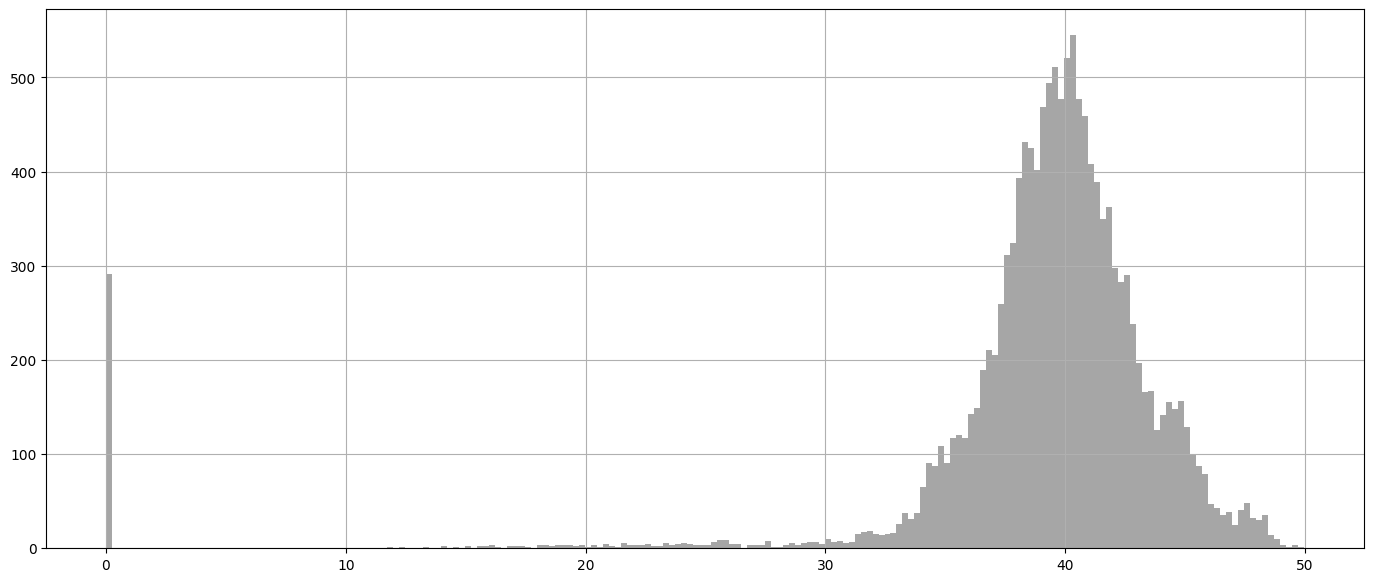

In [54]:
rougher_concentrate = train_df.loc[:, ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']]
rougher_concentrate['sum_concentrate'] = rougher_concentrate['rougher.output.concentrate_au'] + rougher_concentrate['rougher.output.concentrate_ag'] + rougher_concentrate['rougher.output.concentrate_pb']
fig = plt.figure(figsize =(17, 7))
n_bins = 200
x_alpha = 0.7
rougher_concentrate['sum_concentrate'].hist(bins=n_bins, alpha = x_alpha, color = 'Grey', grid=True);

In [55]:
rougher_concentrate.sort_values(by='sum_concentrate', ascending=True)

,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,sum_concentrate
4908,0.000000,0.000000,0.000000,0.000000
4915,0.000000,0.000000,0.000000,0.000000
6045,0.000000,0.000000,0.000000,0.000000
10334,0.000000,0.000000,0.000000,0.000000
7788,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
5210,22.644492,16.581893,10.291525,49.517910
13874,24.270728,15.898679,9.431569,49.600977
2343,21.425070,18.243749,9.994301,49.663120
1981,23.516752,17.209838,8.974353,49.700943


Как мы уже указывали ранее, имеется 300 значений с нулевой концентрацией металлов для этого этапа. Убираем эти данные из обучающего датасета.

In [56]:
#убираем из данных нулевые значения для концентраций
train_df = train_df[(train_df['rougher.output.concentrate_au'] > 0)]
train_df = train_df[(train_df['rougher.output.concentrate_ag'] > 0)]
train_df = train_df[(train_df['rougher.output.concentrate_pb'] > 0)]

train_df.shape

(13366, 87)

In [57]:
rougher_concentrate['sum_concentrate'].mean() #средняя суммарная концентрация на этапе выхода с флотации

38.95978940836274

Финальный концентрат:

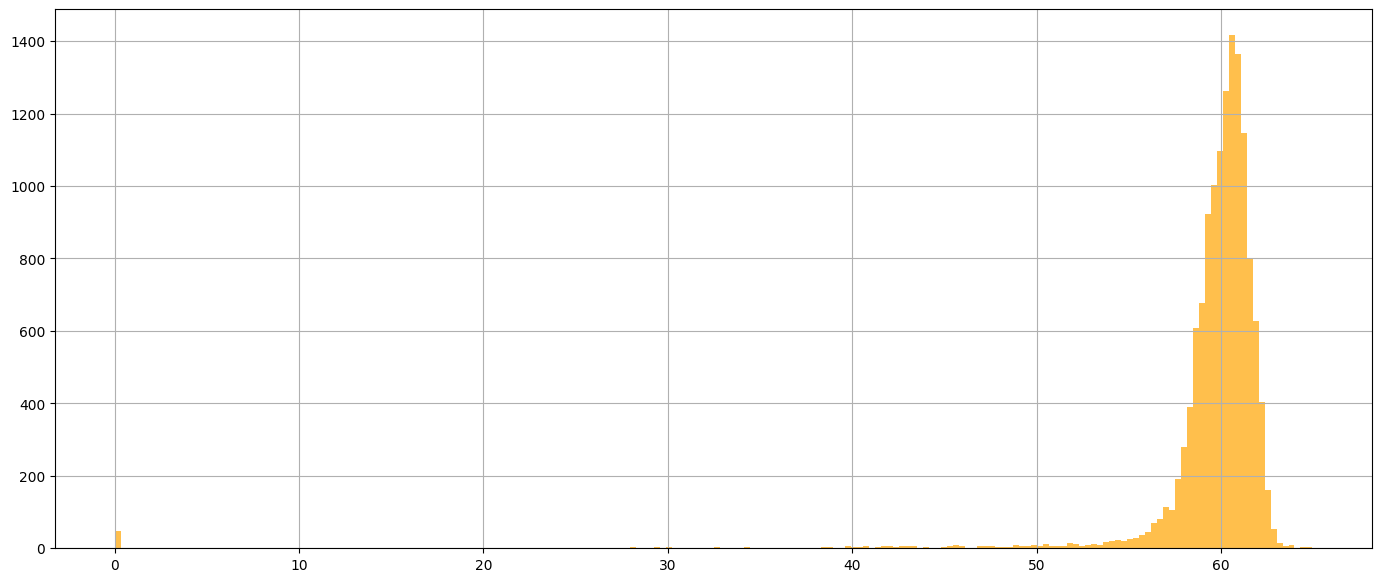

In [58]:
final_concentrate = train_df.loc[:, ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']]
final_concentrate['sum_concentrate'] = final_concentrate['final.output.concentrate_au'] + final_concentrate['final.output.concentrate_ag'] + final_concentrate['final.output.concentrate_pb']
fig = plt.figure(figsize =(17, 7))
n_bins = 200
x_alpha = 0.7
final_concentrate['sum_concentrate'].hist(bins=n_bins, alpha = x_alpha, color = 'Orange', grid=True);

Аналогично, убираем нули. Также, это распределение имеет длинный хвост - выброс вниз. Избавимся и от него.

In [59]:
#удаляем нули
train_df = train_df[(train_df['final.output.concentrate_au'] > 0)]
train_df = train_df[(train_df['final.output.concentrate_ag'] > 0)]
train_df = train_df[(train_df['final.output.concentrate_pb'] > 0)]

train_df.shape

(13319, 87)

In [60]:
final_concentrate['sum_concentrate'].mean() #средние концентрации на финале

59.58010811518627

Видим, что суммарная концентрация драгоценных металлов увеличивается на каждом последующем этапе очистки/обогащения.

## Модель

### Формирование выборок данных

Определяем данные, необходимые для обучения моделей (список столбцов из `test_df`), собираем обучающую выборку `features_train`, `target_train`, а также `target_test` для обучения. `features_test` - это данные таблицы `test_df`.

`target_train` и `test_train` в свою очередь делятся на целевой признак восстановления после флотации `rougher.output.recovery` и восстановления финальное `final.output.recovery`. 

Выборки соответственно: 
- `target_train_rougher`,
- `target_train_final`,
- `target_test_rougher`,
- `target_test_final`.

Формируем данные признаков:

In [61]:
features_train = train_df.drop(not_in_test, axis=1) #удаление столбцов, не входящих в тестовую выборку
features_train = features_train.drop('date', axis=1) #удаляем столбец даты

features_test = test_df.drop('date', axis=1) #удаляем столбец даты

Формируем данные целевых признаков. Целевые признаки для тестовых выборок нужно достать из исходных данных, с индексацией по дате. 

In [62]:
target_train_rougher = train_df['rougher.output.recovery'] #целевой тренировочный для флотации
target_train_final = train_df['final.output.recovery'] #целевой тренировочный для финального

target_test_rougher = test_df.merge(full_df, on='date')  #соединяем датасеты по date
target_test_rougher = target_test_rougher['rougher.output.recovery'] #целевой тестовый для флотации

target_test_final = test_df.merge(full_df, on='date')  #соединяем датасеты по date
target_test_final = target_test_final['final.output.recovery'] #целевой тестовый для флотации

Выборки сформированы.

### Пробное обучение

Проведем пробное обучение на модели линейной регрессии. Так мы узнаем, имеется ли какая-либо ошибка, или на подготовленных данных можно обучить модель.

In [63]:
model_check = LinearRegression() 
model_check.fit(features_train, target_train_rougher) 
model_check.fit(features_train, target_train_final) 

LinearRegression()

Данные для обучения сформированы корректно.

### Функция sMAPE

Главной метрикой качества в проекте является `sMAPE` - симметричное среднее абсолютное процентное отклонение. Она похожа на `MAE`, но выражается не в абсолютных величинах, а в относительных. Она одинаково учитывает масштаб и целевого признака, и предсказания.

In [64]:
def smape_func(target_test, prediction): #функция с двумя аргументами
    values = [] #пустой список
    for i in range(len(target_test)): #для каждого в аргументе
        value = ((abs(target_test[i] - prediction[i])) / ((abs(target_test[i]) + abs(prediction[i])) / 2)) *100 #вычисляем по формуле каждое значение
        values.append(value) #заполняем список проектами
    smape = sum(values) / len(target_test) #считаем метрику sMAPE
    return smape #возвращаем метрику

Вычисление итоговой sMAPE

In [65]:
def total_smape(smape_rougher, smape_final): #функция с двумя аргументами
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final #вычисляем по формуле
    return total_smape #возвращаем конечное значение

Введем параметр `smape_scorer` для прогонки его через кросс-валидацию.

In [66]:
smape_scorer = make_scorer(smape_func, greater_is_better=False) #создаем скорер для функции sMAPE, с наилучшим минимальным результатом

### Обучение моделей

#### Линейная регрессия

Среднее значение метрики sMAPE для модели линейной регрессии, для целевого признака флотации с проведением кросс-валидации:

In [67]:
regression_rougher = LinearRegression() #линейная регрессия
#кросс-валидация с использованием скорера, с разделением на 5 выборок
regression_rougher_scores = cross_val_score(regression_rougher, features_train, target_train_rougher.values, scoring=smape_scorer, cv=5)
#считаем среднее значение для метрики sMAPE для флотации
regression_rougher_score = abs(regression_rougher_scores.mean())
print(regression_rougher_score)

6.86154868139167


Среднее значение метрики sMAPE для модели линейной регрессии, для целевого признака финального с проведением кросс-валидации:

In [68]:
#аналогично предыдущему, только для финального этапа
regression_final = LinearRegression()
regression_final_scores = cross_val_score(regression_final, features_train, target_train_final.values, scoring=smape_scorer, cv=5)
regression_final_score = abs(regression_final_scores.mean())
print(regression_final_score)

10.66395959811658


In [69]:
total_smape(regression_rougher_score, regression_final_score)

9.713356868935353

#### Дерево решений

Среднее значение метрики sMAPE для модели дерева решений, для целевого признака флотации с проведением кросс-валидации и с перебором гиперпараметра глубины:

In [70]:
tree_rougher = DecisionTreeRegressor(random_state=RANDOM_STATE) #дерево решений

parameters = { 'max_depth': range (1,8), #гиперпараметры, максимальная глубина
              'min_samples_leaf': range (1,7), #минимальное число образцов в листах 
              'min_samples_split': range (2,6, 2) } #минимальное число образцов для сплита}
#применение метода гридсёрч со встроенной кросс-валидацией к модели дерева с перебором указанных параметров
#и скоридгом sMAPE минимального значения
grid_tree_rougher = GridSearchCV(tree_rougher, param_grid= parameters, scoring= smape_scorer, cv=5)
#обучение модели
grid_tree_rougher.fit(features_train, target_train_rougher.values)

#лучшее значение sMAPE после перебора параметров 
best_tree_rougher = abs(grid_tree_rougher.best_score_)

print("Лучшие параметры для модели дерева решений с "\
    "использованием кросс-валидации:", grid_tree_rougher.best_params_)
print("Наименьшее значение метрики sMAPE для модели дерева решений "\
    "при лучших гиперпараметрах с использованием кросс-валидации:", best_tree_rougher)

Лучшие параметры для модели дерева решений с использованием кросс-валидации: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}
Наименьшее значение метрики sMAPE для модели дерева решений при лучших гиперпараметрах с использованием кросс-валидации: 6.986015758838458


Параметры наилучшей характеристики для дерева: 

Среднее значение метрики sMAPE для модели дерева решений, для целевого признака финального с проведением кросс-валидации и с перебором гиперпараметра глубины:

In [71]:
#аналогичный процесс для дерева решений, только для финальной выболрки
tree_final = DecisionTreeRegressor(random_state=RANDOM_STATE)
parameters = { 'max_depth': range (1,8),
              'min_samples_leaf': range (1,7),
              'min_samples_split': range (2,6, 2) }
grid_tree_final = GridSearchCV(tree_final, param_grid= parameters, scoring= smape_scorer, cv=5)
grid_tree_final.fit(features_train, target_train_final.values)

best_tree_final = abs(grid_tree_final.best_score_)

print("Лучшие параметры для модели дерева решений с "\
    "использованием кросс-валидации:", grid_tree_final.best_params_)
print("Наименьшее значение метрики sMAPE для модели дерева решений "\
    "при лучших гиперпараметрах с использованием кросс-валидации:", best_tree_final)

Лучшие параметры для модели дерева решений с использованием кросс-валидации: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Наименьшее значение метрики sMAPE для модели дерева решений при лучших гиперпараметрах с использованием кросс-валидации: 9.13482351290793


Лучшие гиперпараметры для модели `min_samples_leaf` и `min_samples_split` принимают дефолтное значение, а значение глубины дерева равно 1.

Значение метрики sMAPE для дерева решений:

In [72]:
total_smape(best_tree_rougher, best_tree_final)

8.597621574390562

#### Случайный лес

Среднее значение метрики  sMAPE для модели случайного леса, для целевого признака флотации с проведением кросс-валидации с перебором гиперпараметров:

In [73]:
forest_rougher = RandomForestRegressor(random_state=RANDOM_STATE) #модель случайного леса
parameters = {'n_estimators': range (9, 20, 2), 'max_depth': range (3, 8)} #перебор гиперпараметров (заранее посчитал, где наилучшее значение метрики равно 70)
#применение метода гридсёрч со встроенной кросс-валидацией к модели леса с перебором указанных параметров
#и скоридгом sMAPE минимального значения
grid_forest_rougher = GridSearchCV(forest_rougher, param_grid= parameters, scoring= smape_scorer, cv=5)
#обучение модели
grid_forest_rougher.fit(features_train, target_train_rougher.values)

#лучшее значение sMAPE после перебора параметров 
best_forest_rougher = abs(grid_forest_rougher.best_score_)

print("Лучшие параметры для модели случайного леса с "\
    "использованием кросс-валидации:", grid_forest_rougher.best_params_)
print("Наименьшее значение метрики sMAPE для модели случайного леса "\
    "при лучших гиперпараметрах с использованием кросс-валидации:", best_forest_rougher)

Лучшие параметры для модели случайного леса с использованием кросс-валидации: {'max_depth': 6, 'n_estimators': 15}
Наименьшее значение метрики sMAPE для модели случайного леса при лучших гиперпараметрах с использованием кросс-валидации: 6.1376442510620555


In [74]:
#аналогично лесу для флотации
forest_final = RandomForestRegressor(random_state=RANDOM_STATE) 
parameters = {'n_estimators': range (9, 20, 2), 'max_depth': range (3, 8)} #заранее посчитал, наилучшее значение метрики равно 70
grid_forest_final = GridSearchCV(forest_final, param_grid= parameters, scoring= smape_scorer, cv=5)
grid_forest_final.fit(features_train, target_train_final.values)


best_forest_final = abs(grid_forest_final.best_score_)

print("Лучшие параметры для модели случайного леса с "\
    "использованием кросс-валидации:", grid_forest_final.best_params_)
print("Наименьшее значение метрики sMAPE для модели случайного леса "\
    "при лучших гиперпараметрах с использованием кросс-валидации:", best_forest_final)

Лучшие параметры для модели случайного леса с использованием кросс-валидации: {'max_depth': 4, 'n_estimators': 13}
Наименьшее значение метрики sMAPE для модели случайного леса при лучших гиперпараметрах с использованием кросс-валидации: 8.495798959502324


In [75]:
total_smape(best_forest_rougher, best_forest_final)

7.906260282392257

Лучшее значение метрики sMAPE показала модель случайного леса, значение sMAPE равно 7.955.

#### Проверка качества лучшей модели на тестовой выборке

In [76]:
forest_rougher_test = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=15, max_depth=6) #модель леса с глубиной
forest_rougher_test.fit(features_train, target_train_rougher) #обучение
forest_rougher_predictions = forest_rougher_test.predict(features_test) # получаем предсказания модели на валидационной выборке

forest_rougher_smape = abs(smape_func(target_test_rougher, forest_rougher_predictions)) #среденее значение sMAPE
print("sMAPE_best_forest_rougher_test", forest_rougher_smape)


forest_final_test = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=13, max_depth=4) #модель леса с глубиной
forest_final_test.fit(features_train, target_train_final) #обучение
forest_final_predictions = forest_final_test.predict(features_test) # получаем предсказания модели на валидационной выборке

forest_final_smape = abs(smape_func(target_test_final, forest_final_predictions)) #среденее значение sMAPE
print("sMAPE_best_forest_final_test", forest_final_smape)

print("sMAPE_best_total_smape_test", total_smape(forest_rougher_smape, forest_final_smape))

sMAPE_best_forest_rougher_test 7.968559049147914
sMAPE_best_forest_final_test 9.818273379885932
sMAPE_best_total_smape_test 9.355844797201428


#### Значение метрики на константной модели

In [77]:
dummy_clf_rougher = DummyRegressor(strategy='median') #создание baseline модели - наиболее часто встречающееся
dummy_clf_rougher.fit(features_train, target_train_rougher) #обучение модели
dummy_clf_rougher_pred = dummy_clf_rougher.predict(target_test_rougher) # получаем предсказания модели на валидационной выборке

dummy_rougher_smape = abs(smape_func(target_test_rougher, dummy_clf_rougher_pred)) #среденее значение sMAPE
print("sMAPE_dummy_rougher", dummy_rougher_smape)


dummy_clf_final = DummyRegressor(strategy='median') #создание baseline модели - наиболее часто встречающееся
dummy_clf_final.fit(features_train, target_train_final) #обучение модели
dummy_clf_final_pred = dummy_clf_final.predict(target_test_final) # получаем предсказания модели на валидационной выборке

dummy_final_smape = abs(smape_func(target_test_final, dummy_clf_final_pred)) #среденее значение sMAPE
print("sMAPE_dummy_final", dummy_final_smape)

print("sMAPE_best_total_smape_test", total_smape(dummy_rougher_smape, dummy_final_smape))

sMAPE_dummy_rougher 8.51352358920211
sMAPE_dummy_final 9.75135141456729
sMAPE_best_total_smape_test 9.441894458225995


Итоговое значение метрики ниже, чем на лучшей модели леса. Значит модель прошла проверку на вменяемость.

## Выводы по проекту

В проекте проведена комплексная работа по изучению и обработке данных.

Рассчитана вручную эффективность обогащения, результат получился одинаковым с данным в датасете? `MAE` был близок к нулю.

Данные подготовлены к обучению: пропуски заполнены, выбросы устранены. 

Была измерена концентрация каждого драгоценного металла в зависимости от этапа обработки. Так как добывается золото, то как раз концентрация золота увеличивалась в течение всего процесса обогащения.

Рассмотрели распределение гранул сырья на двух этапах - входе флотации и входе первичной очистки для тренировочной и тестовой выборок. Размеры гранул практически одинаковы, что говорит о том, что обучение будет корректным.

Найдены суммарные концентрации металлов на каждом этапе На этапе анализа также были устранены нулевые значения концентраций металлов в руде - такой сценарий невозможен.

Данные подготовлены к обучению, тренировочные и тестовые выборки сформированы.

Обучение проводилось на моделях:
- линейной регрессии,
- дерева решений с перебором гиперпараметров, 
- случайного леса с перебором гиперпараметров.

Наилучший результат на тренировочной выборке - наименьшее значение метрики sMAPE, показала модель случайного леса с 15 деревьями и глубиной 6 для этапа флотации и 13 деревьями и глубиной 4 для финального этапа.
- `sMAPE_best_forest_rougher` равен 6.1376442510620555,
- `sMAPE_best_forest_final` равен 8.495798959502324,
- `sMAPE_best_total_smape` равен 7.955304656488359.

Наилучший результат на тестовой выборке:
- `sMAPE_best_forest_rougher_test` 7.968559049147914
- `sMAPE_best_forest_final_test` 9.818273379885932
- `sMAPE_best_total_smape_test` 9.355844797201428